This data set was taken from kaggle: https://www.kaggle.com/datasets/mohammadrahdanmofrad/landslide-risk-assessment-factors

This is a dataset of landslide risk assessment factors in more than 4295 sites in Iran. Each row therefore is unique and represents a single landslide.

In this project, we will be cleaning and visualizing landslide data to better understand what factors contribute most to these landslides.

In [1]:
# Import some libraries
import pandas as pd
import numpy as np

In [2]:
# Load in dataset
df = pd.read_csv("Landslide_Factors_IRAN.csv")

In [3]:
# View dataset
df.head()

,ID,LONG,LAT,SUB_Basin,Elevation,AAP(mm),RiverDIST(m),FaultDIST(m),Landuse_Type,Slop(Percent),Slop(Degrees),GEO_UNIT,DES_GEOUNI,Climate_Type,DES_ClimateType
0,1,52.326,27.763,Mehran,617.0,137,1448.705292,40639.57890,poorrange,42.240669,22.899523,EOas-ja,"Undivided Asmari and Jahrum Formation , regard...",A-M-VW,"Warm and humid, with a humid period longer tha..."
1,2,52.333,27.772,Mehran,944.0,137,344.299484,40135.02913,mix(woodland_x),68.219116,34.301464,KEpd-gu,Keewatin Epedotic quartz diorite,A-M-VW,"Warm and humid, with a humid period longer tha..."
2,3,52.326,27.763,Mehran,617.0,137,1448.705292,40639.57890,poorrange,42.240669,22.899523,EOas-ja,"Undivided Asmari and Jahrum Formation , regard...",A-M-VW,"Warm and humid, with a humid period longer tha..."
3,4,52.333,27.694,Mehran,55.0,137,1889.828623,42189.54442,rock,12.141766,6.922833,Mlmmi,Low weathering grey marls alternating with ba...,A-M-VW,"Warm and humid, with a humid period longer tha..."
4,5,52.324,27.682,Mehran,20.0,137,874.201691,43010.08400,poorrange,2.216230,1.269598,MuPlaj,"Brown to grey , calcareous , feature - formin...",A-M-VW,"Warm and humid, with a humid period longer tha..."


For reference, the climate codes are found here: https://www.ujecology.com/articles/climate-design-and-its-role-in-reducing-energy-consumption-management-a-case-study-of-kerman-city-of-iran.pdf on page 4.

| Number | Climate Codes | Moisture     | Winter | Summer      |
|--------|---------------|--------------|--------|-------------|
| 1      | A-C-VW       | Aride        | Cool   | Very Warm   |
| 2      | A-C-W        | Aride        | Cool   | Warm        |
| 3      | A-K-M        | Aride        | Cold   | Mild        |
| 4      | A-K-W        | Aride        | Cold   | Warm        |
| 5      | A-M-VW       | Aride        | Mild   | Very Warm   |
| 6      | A-M-W        | Aride        | Mild   | Warm        |
| 7      | HA-C-VW      | Hyper Aride  | Cool   | Very Warm   |
| 8      | HA-M-VW      | Hyper Aride  | Mild   | Very Warm   |
| 9      | SA-C-W       | Semi Aride   | Cool   | Warm        |
| 10     | SA-K-M       | Semi Aride   | Cold   | Mild        |
| 11     | SA-K-W       | Semi Aride   | Cold   | Warm        |


In [4]:
# Describe the dataset
display(df.describe())
display(df.shape)

,ID,LONG,LAT,Elevation,AAP(mm),RiverDIST(m),FaultDIST(m),Slop(Percent),Slop(Degrees)
count,4295.000000,4295.000000,4295.000000,4295.000000,4295.000000,4295.000000,4295.000000,4295.000000,4295.000000
mean,2148.000000,50.991609,34.934854,1391.111692,242.166007,809.247705,5464.176909,23.083628,12.684708
std,1240.004032,3.354156,2.639496,673.859458,136.964710,974.939030,5920.570823,15.483778,7.976655
min,1.000000,44.302000,26.424000,0.000000,54.000000,0.065920,1.121601,0.000000,0.000000
25%,1074.500000,48.433000,32.997500,860.500000,158.000000,208.199375,1314.589467,11.533882,6.579355
50%,2148.000000,50.499000,36.173000,1552.000000,194.000000,526.187336,3486.626632,20.419369,11.540784
75%,3221.500000,53.190500,36.864000,1902.500000,270.000000,1116.083961,7701.447471,31.399784,17.432177
max,4295.000000,61.792000,39.293000,3583.000000,1142.000000,25656.226180,44108.087060,100.000000,45.000000


(4295, 15)

In [5]:
# Check empty values first.
df.isnull().sum()

ID                 0
LONG               0
LAT                0
SUB_Basin          0
Elevation          0
AAP(mm)            0
RiverDIST(m)       0
FaultDIST(m)       0
Landuse_Type       0
Slop(Percent)      0
Slop(Degrees)      0
GEO_UNIT           0
DES_GEOUNI         0
Climate_Type       0
DES_ClimateType    0
dtype: int64

There still may need to be more cleaning.

In [6]:
# Check for 'space' values values in each column
empty_values = (df == ' ').sum()

print(empty_values)


ID                  0
LONG                0
LAT                 0
SUB_Basin           1
Elevation           0
AAP(mm)             0
RiverDIST(m)        0
FaultDIST(m)        0
Landuse_Type        4
Slop(Percent)       0
Slop(Degrees)       0
GEO_UNIT           10
DES_GEOUNI         10
Climate_Type        3
DES_ClimateType     3
dtype: int64


In [7]:
df['SUB_Basin'].value_counts()

SUB_Basin
Karun           593
Qezel Owzan     447
Gorgan          364
Diyala          279
Safid Rud       184
               ... 
Nahr at Tib       1
Karaj             1
Bampur            1
Lake Orumieh      1
Lenkeran          1
Name: count, Length: 65, dtype: int64

Replace with majority class.

In [8]:
# Replace space values in 'SUB_Basin' with 'Karun'
df['SUB_Basin'].replace(' ', 'Karun')

0                               Mehran
1                               Mehran
2                               Mehran
3                               Mehran
4                               Mehran
                     ...              
4290                            Karasu
4291    Vilascay / Lankaran / Tangarud
4292                            Karasu
4293                            Karasu
4294    Vilascay / Lankaran / Tangarud
Name: SUB_Basin, Length: 4295, dtype: object

In [9]:
empty_values = (df == ' ').sum()

print(empty_values)

ID                  0
LONG                0
LAT                 0
SUB_Basin           1
Elevation           0
AAP(mm)             0
RiverDIST(m)        0
FaultDIST(m)        0
Landuse_Type        4
Slop(Percent)       0
Slop(Degrees)       0
GEO_UNIT           10
DES_GEOUNI         10
Climate_Type        3
DES_ClimateType     3
dtype: int64


Let's write a function to perform the same procedure with the rest of the data, since they are categorical and relatively low in count.

In [10]:
def replace_spaces_with_majority(df, column_name):
    # Find the majority class in the specified column
    majority_class = df[column_name].mode()[0]
    
    # Replace space values with the majority class
    df[column_name].replace(' ', majority_class, inplace=True)

# Call the function for relevant columns
replace_spaces_with_majority(df, 'Landuse_Type')
replace_spaces_with_majority(df, 'GEO_UNIT')
replace_spaces_with_majority(df, 'DES_GEOUNI')
replace_spaces_with_majority(df, 'GEO_UNIT')
replace_spaces_with_majority(df, 'Climate_Type')
replace_spaces_with_majority(df, 'DES_ClimateType')

/var/folders/b7/kcq1z8rd2xd2123cjmdz7bzm0000gp/T/ipykernel_31264/2940673380.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column_name].replace(' ', majority_class, inplace=True)


In [11]:
empty_values = (df == ' ').sum()

print(empty_values)

ID                 0
LONG               0
LAT                0
SUB_Basin          1
Elevation          0
AAP(mm)            0
RiverDIST(m)       0
FaultDIST(m)       0
Landuse_Type       0
Slop(Percent)      0
Slop(Degrees)      0
GEO_UNIT           0
DES_GEOUNI         0
Climate_Type       0
DES_ClimateType    0
dtype: int64


One last thing; we don't need the ID column.

In [12]:
# Dropping the 'ID' column
df = df.drop(columns=['ID'])

Great! Now let's visualize some data to see if we can find any interesting trends. Let's start with some high level analysis.

In [13]:
df['Climate_Type'].value_counts()

Climate_Type
SA-K-W     1495
SA-C-W     1124
A-C-W       583
SH-C-W      226
A-M-VW      166
SA-C-VW     143
PH-C-W      125
SA-K-M      124
SH-K-W      100
A-K-W        78
A-C-VW       54
H-C-W        51
SH-K-M       19
H-K-W         7
Name: count, dtype: int64

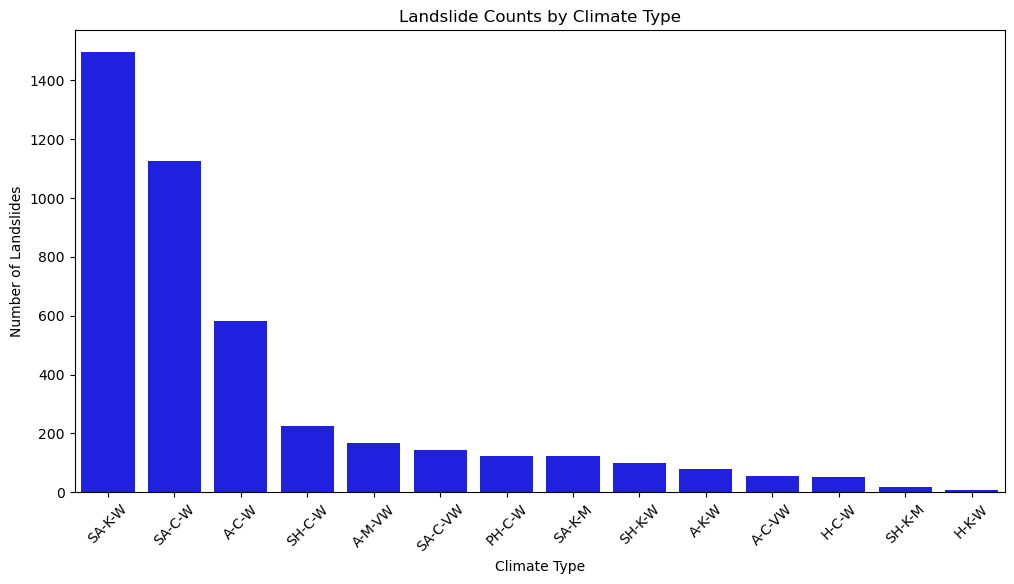

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

climate_counts = df['Climate_Type'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=climate_counts.index, y=climate_counts.values, color ='blue')
plt.title('Landslide Counts by Climate Type')
plt.xlabel('Climate Type')
plt.ylabel('Number of Landslides')
plt.xticks(rotation=45)
plt.show()


From above, by far, most landslides occur in Semi Aride	Cold Warm climates, followed by Semi Aride Cool	Warm climates, and then Aride Cool Warm climates.


Now what about elevation? Any trends?

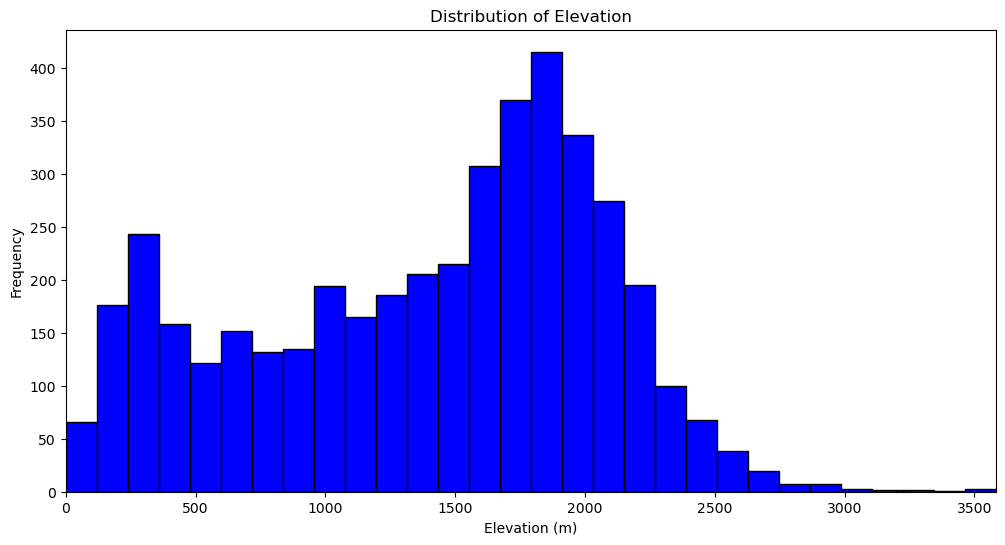

In [25]:
plt.figure(figsize=(12, 6))
plt.hist(df['Elevation'].astype(int), bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Elevation')
plt.xlabel('Elevation (m)')
plt.ylabel('Frequency')
plt.xlim(0, 3583)  # Set x-axis limits to the desired range
plt.show()




Elevations around the 1700 range, and the 250 range (meters), tend to have the most landslides.

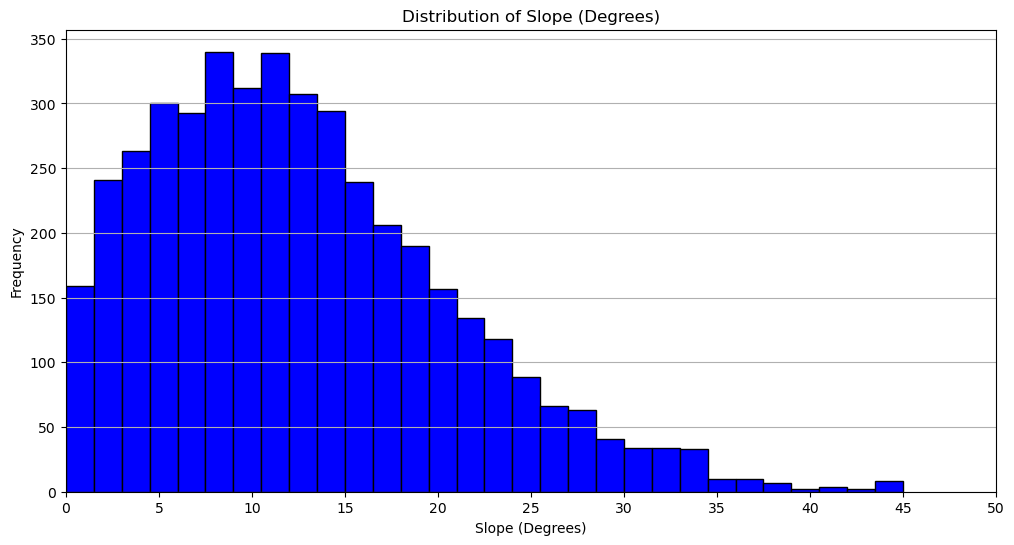

In [26]:
plt.figure(figsize=(12, 6))
plt.hist(df['Slop(Degrees)'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Slope (Degrees)')
plt.xlabel('Slope (Degrees)')
plt.ylabel('Frequency')
plt.xlim(0, 50)  # Set x-axis limits if needed
plt.xticks(range(0, 51, 5))  # Set x-axis ticks every 5 degrees
plt.grid(axis='y')  # Optional: Add gridlines for better readability
plt.show()


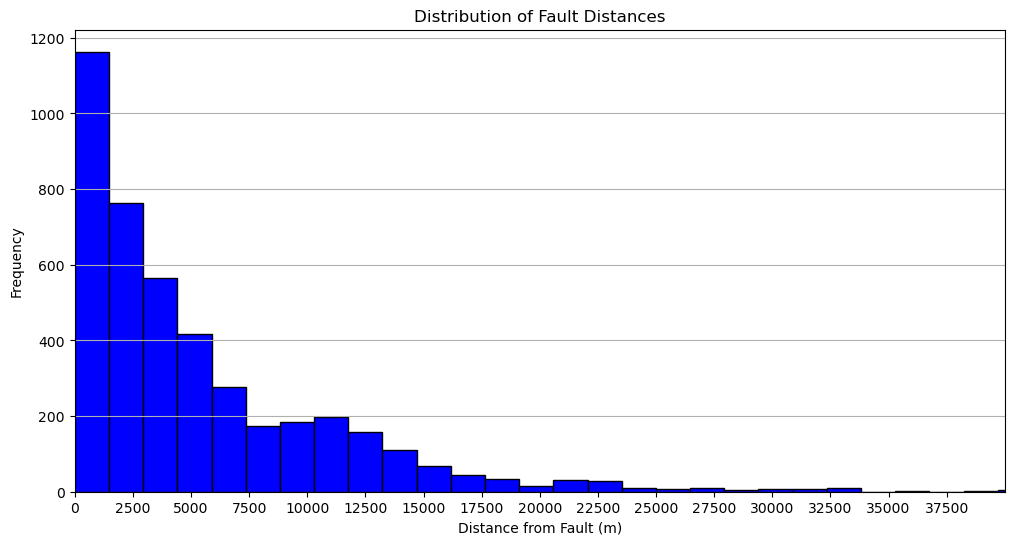

In [36]:
plt.figure(figsize=(12, 6))
plt.hist(df['FaultDIST(m)'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Fault Distances')
plt.xlabel('Distance from Fault (m)')
plt.ylabel('Frequency')
plt.xlim(0, 40000)  # Set x-axis limits if needed
plt.xticks(range(0, 40000, 2500))  # Set x-axis ticks every 5 degrees
plt.grid(axis='y')  # Optional: Add gridlines for better readability
plt.show()

The vast majority of landslides had the distance from fault from 0 to about 2000 meters, and then dips off until about 7500 meters, and ticks up a bit. Then the distances decrease.

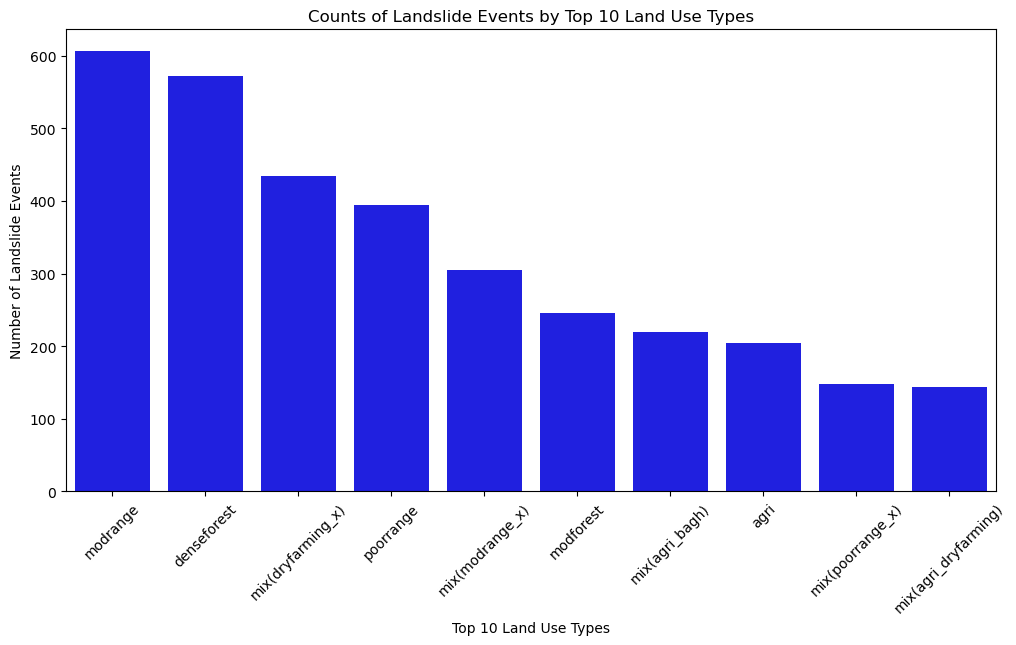

In [41]:
# Count occurrences of each Landuse_Type, and grab only the top 10 for simplicity
landuse_counts = df['Landuse_Type'].value_counts().head(10)

# Plotting the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=landuse_counts.index, y=landuse_counts.values, color='blue')
plt.title('Counts of Landslide Events by Top 10 Land Use Types')
plt.xlabel('Top 10 Land Use Types')
plt.ylabel('Number of Landslide Events')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.show()


Now let's analyze some attributes through a heatmap.

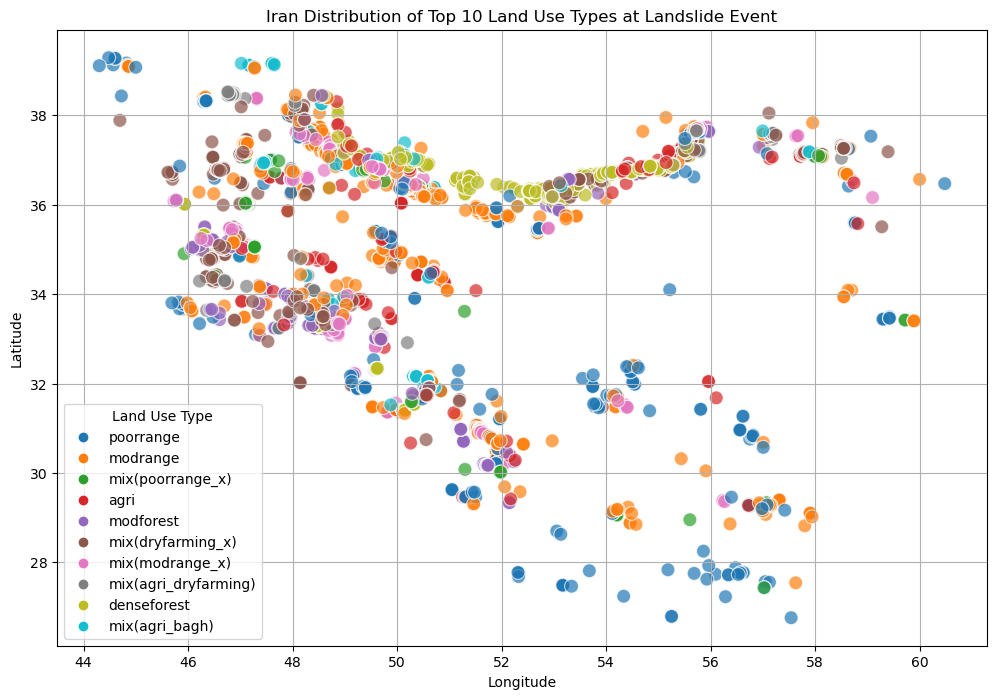

In [67]:
# Count occurrences of each land use type
landuse_counts = df['Landuse_Type'].value_counts()

# Get the top 10 land use types
top_landuse = landuse_counts.head(10).index.tolist()

# Filter the DataFrame for top land use types
top_landuse_df = df[df['Landuse_Type'].isin(top_landuse)]

# Create a scatter plot to visualize the top land use types
plt.figure(figsize=(12, 8))
sns.scatterplot(data=top_landuse_df, x='LONG', y='LAT', hue='Landuse_Type', s=100, alpha=0.7)

plt.title('Iran Distribution of Top 10 Land Use Types at Landslide Event')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Land Use Type')
plt.grid(True)
plt.show()



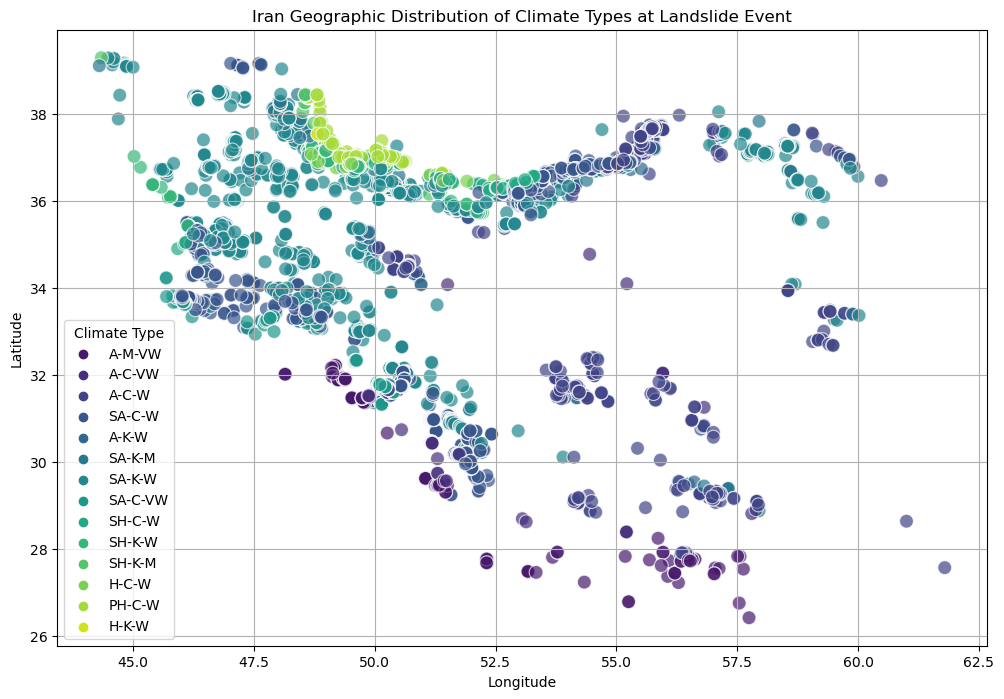

In [66]:
# Create a scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='LONG', y='LAT', hue='Climate_Type', palette='viridis', s=100, alpha=0.7)

# Enhance the plot
plt.title('Iran Geographic Distribution of Climate Types at Landslide Event')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Climate Type')
plt.grid(True)
plt.show()



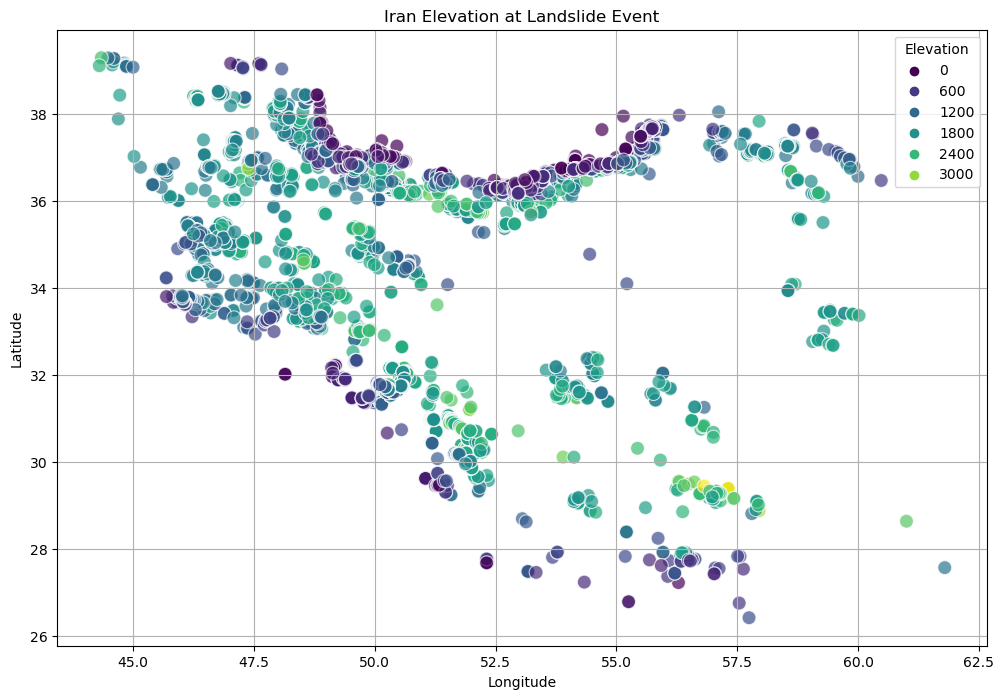

In [65]:
# Create a scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='LONG', y='LAT', hue='Elevation', palette='viridis', s=100, alpha=0.7)

# Enhance the plot
plt.title('Iran Elevation at Landslide Event')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Elevation')
plt.grid(True)
plt.show()


<b> Summary: </b> We now know where and at what frequency certain factors contribute to landslides most in Iran. For example, like in above, SA -K-W (Semi Aride Cold Warm) climates contribute most to landslides, and occur more as one travels northward, especially in northwest and northeast regions. Landslides also occurred most closely to the location of the faults, and around slopes of 10 degrees, and around 1700m elevation. "modrange" is also the most frequent land use type, followed by 'denseforest'. Iran must allocate resources and research initiavites in these areas to help prevent more landslides.